### Sarcasm detection 


In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

#### load newsheadlines ###


import json
with open('Sarcasm_Headlines_Dataset_v2.json','r')as f:
    data = f.read()

    data = "[" + data.replace("}", "},", data.count("}")-1) + "]"

    datastore = json.loads(data)

In [2]:
#### news headlines ### 

datastore


[{'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205',
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207',
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html',
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031',
  'headline': 'inclement weather prevents liar from getting to work',
  'is_sarcastic': 1},
 {'article_link': 'https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546',
  'headline': "mother comes pretty close to using wor

In [3]:
### data extraction 

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
sentences

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly",
 'my white inheritance',
 '5 ways to file your taxes with less stress',
 "richard branson's global-warming donation nearly as much as cost of failed balloon trips",
 'shadow government getting too large to meet in marriott conference room b',
 'lots of parents know this scenario',
 'this lesbian is considered a father in indiana (and an amazing one at that)',
 "amanda peet told her daughter sex is 'a special hug'",
 'what to know regarding current treatments for ebola',
 "chris christie suggests hillary clinton was to blame for boko haram's kidnapping of hundreds of schoolgirls",
 'ford develops new suv that runs purely on gasoline',
 'uber ceo travis kalanick step

In [108]:
### parameters ###

vocab_size = 22000
embedding_dim = 16
max_length = 55
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 25000


In [109]:
### create a training set and a testing set
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(len(training_sentences))
print(len(testing_sentences ))

25000
3619


In [110]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
### create word index ###
word_index = tokenizer.word_index

### padding sentences to make all the sentence length the same ###
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(training_padded[100])

print(training_padded.shape) 

[  40 1843    3   14 8262  202   20 3248   15 3016 2657    6  180  462
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
(25000, 55)


In [111]:
### check out some data stored in wword_index
n = 0
for (key,value) in word_index.items():
    if n < 8:
        n += 1 
        print('key :',key,'\n value:',value)
    else:
        break

key : <OOV> 
 value: 1
key : to 
 value: 2
key : of 
 value: 3
key : the 
 value: 4
key : in 
 value: 5
key : for 
 value: 6
key : a 
 value: 7
key : on 
 value: 8


In [112]:
## list to array ##
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [132]:
### choose the type of model 

model_type = 4


if model_type == 1: 
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
if model_type == 2: ### flattened data
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
if model_type == 3: ### higher tensor density 
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(3*16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
if model_type == 4: ### 87 % accuracy 
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),     
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 55, 16)            352000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 25        
Total params: 352,433
Trainable params: 352,433
Non-trainable params: 0
_________________________________________________________________


In [35]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(22000, 16)


In [26]:
### number of times samples pass

num_epochs = 8

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/8
20000/20000 - 3s - loss: 0.4316 - accuracy: 0.7905 - val_loss: 0.3051 - val_accuracy: 0.8670
Epoch 2/8
20000/20000 - 3s - loss: 0.1781 - accuracy: 0.9329 - val_loss: 0.3043 - val_accuracy: 0.8683
Epoch 3/8
20000/20000 - 3s - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.3583 - val_accuracy: 0.8667
Epoch 4/8
20000/20000 - 3s - loss: 0.0238 - accuracy: 0.9948 - val_loss: 0.4232 - val_accuracy: 0.8616
Epoch 5/8
20000/20000 - 3s - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.4828 - val_accuracy: 0.8604
Epoch 6/8
20000/20000 - 3s - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.5207 - val_accuracy: 0.8617
Epoch 7/8
20000/20000 - 3s - loss: 9.6609e-04 - accuracy: 1.0000 - val_loss: 0.5573 - val_accuracy: 0.8615
Epoch 8/8
20000/20000 - 3s - loss: 5.5473e-04 - accuracy: 1.0000 - val_loss: 0.5879 - val_accuracy: 0.8622


### model 1 

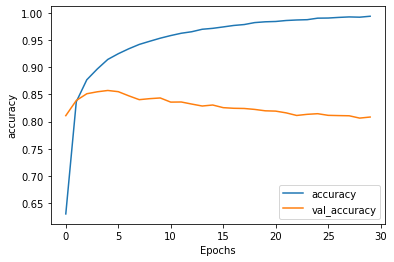

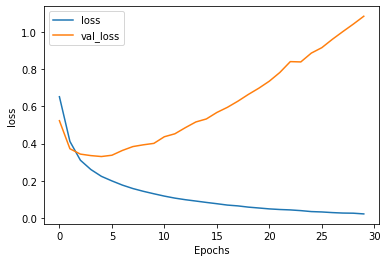

In [89]:

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Model 2 


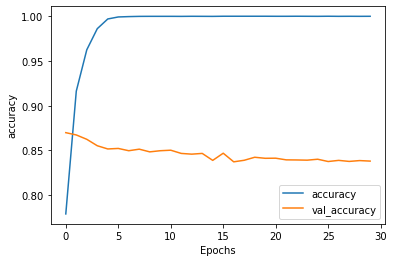

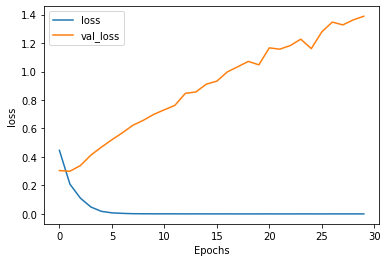

In [93]:

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Model 3

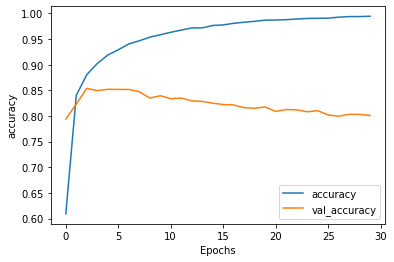

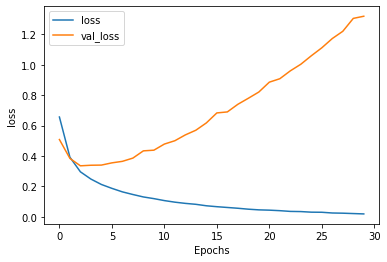

In [97]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

###  From the graphs, the accuracy peaks at around 3 or 5 epochs. Furthur increasing epoch size increase the chance of overfitting the data.  Changing layers and densities have a small effect on the max accuracy.

In [135]:
### training using model 3 with only 3 epoch ###


num_epochs = 3

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 25000 samples, validate on 3619 samples
Epoch 1/3
25000/25000 - 3s - loss: 0.2263 - accuracy: 0.9136 - val_loss: 0.3371 - val_accuracy: 0.8513
Epoch 2/3
25000/25000 - 3s - loss: 0.1758 - accuracy: 0.9356 - val_loss: 0.3412 - val_accuracy: 0.8560
Epoch 3/3
25000/25000 - 3s - loss: 0.1383 - accuracy: 0.9520 - val_loss: 0.3578 - val_accuracy: 0.8566


In [146]:
sentence = ["Joe Biden maintains 8-point lead over Donald Trump in new poll",
            "A young Stanford graduate tried to teach me about life. It didn’t go well",
           'White House Vows To Have Something To Stick Into Your Arm By October',
           'Democratic Process In Peril As Millions Of Americans Chase After Mail-In Ballots Caught In Wind',
           'Girl Scout Troop Raises Over $100,000 To Buy Corvette Because Fuck It, It’s Their Money, They Can Do What They Want',
            'Local Student Floods Childhood Home to Remember Life on Campus',
           "Pelosi won't rule out using impeachment as option to stop Trump Supreme Court pick",
           "You look really nice today",
            "So tell me what you want, what you really really want",
           'Local Dog Claims “I Actually Don’t Need to Go on Anymore Walks”']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
for i in model.predict(padded):
    print( 'not sarcastic' if  i< 0.5 else 'sarcastic' )
    print(i)

not sarcastic
[0.02239731]
not sarcastic
[0.08435586]
sarcastic
[0.99652565]
not sarcastic
[0.112436]
sarcastic
[0.9972551]
sarcastic
[0.984769]
not sarcastic
[0.02140608]
sarcastic
[0.8673821]
not sarcastic
[0.00228799]
sarcastic
[0.98921096]


## All sentences are correctly predicted ! 

### Next,  we will be using LSTM to improve the accuracy. 

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),    
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:

num_epochs = 6

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/6
20000/20000 - 32s - loss: 0.4122 - accuracy: 0.8001 - val_loss: 0.3194 - val_accuracy: 0.8583
Epoch 2/6
20000/20000 - 31s - loss: 0.1884 - accuracy: 0.9274 - val_loss: 0.3442 - val_accuracy: 0.8503
Epoch 3/6
20000/20000 - 31s - loss: 0.0957 - accuracy: 0.9657 - val_loss: 0.4087 - val_accuracy: 0.8514
Epoch 4/6
20000/20000 - 32s - loss: 0.0484 - accuracy: 0.9837 - val_loss: 0.4859 - val_accuracy: 0.8467
Epoch 5/6
20000/20000 - 32s - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.5983 - val_accuracy: 0.8426
Epoch 6/6
20000/20000 - 34s - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.6758 - val_accuracy: 0.8406


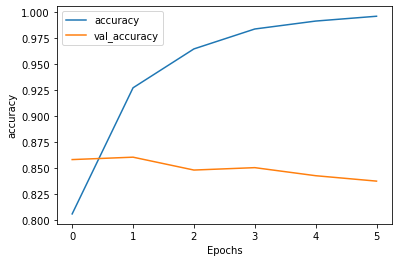

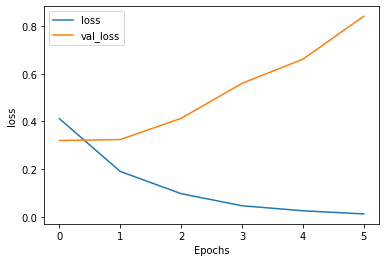

In [51]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Or maybe a convulusion layer?

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(55,4, activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling1D(),    
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 6

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/6
20000/20000 - 3s - loss: 0.4577 - accuracy: 0.7692 - val_loss: 0.3519 - val_accuracy: 0.8475
Epoch 2/6
20000/20000 - 3s - loss: 0.2121 - accuracy: 0.9173 - val_loss: 0.3506 - val_accuracy: 0.8500
Epoch 3/6
20000/20000 - 3s - loss: 0.0817 - accuracy: 0.9742 - val_loss: 0.4624 - val_accuracy: 0.8410
Epoch 4/6
20000/20000 - 3s - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.5731 - val_accuracy: 0.8436
Epoch 5/6
20000/20000 - 3s - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.6857 - val_accuracy: 0.8408
Epoch 6/6
20000/20000 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.7558 - val_accuracy: 0.8395


### GRU?

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),    
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 6

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/6
20000/20000 - 23s - loss: 0.4257 - accuracy: 0.7859 - val_loss: 0.3221 - val_accuracy: 0.8557
Epoch 2/6
20000/20000 - 23s - loss: 0.1957 - accuracy: 0.9227 - val_loss: 0.3210 - val_accuracy: 0.8594
Epoch 3/6
20000/20000 - 22s - loss: 0.0939 - accuracy: 0.9674 - val_loss: 0.3921 - val_accuracy: 0.8529
Epoch 4/6
20000/20000 - 24s - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.5032 - val_accuracy: 0.8501
Epoch 5/6
20000/20000 - 23s - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.6302 - val_accuracy: 0.8472
Epoch 6/6
20000/20000 - 23s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.8086 - val_accuracy: 0.8405
